# Data Pre-processing


AI has ML has Deep Learning
ML HAS two types :

1.	Supervised learning : data has features and -> outcomes

      a.	Regression problem : continuous target, best fitting graph

      b.	Classification : targets discontinuous grouped into classes

2.	Unsupervised : only have features, no outcomes

      a.	Clustering

3.	Semi supervised : aka Q learning, write code so that something is done automatically, like chrome dino game, automated chrome dino, sudoku solver
      
      a.	Reinforcement learning



---



Data divided into 3 groups : training testing validation set


Exploring of data by data analyst :-

O : Obtain data

S : scrubbing or cleaning data

E : Exploring/ visualizing data to find patterns and trends

M : Model data for prediction, multiple analysis

N : interpret data, check accuracy, validate


---


 
Hello World of ML
https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

one value mostly , dominating  Model with high bias pays very little attention to the training data and oversimplifies the model. It always leads to high error on training and test data.: bias

variance : result spread from actual

There is a tradeoff between a model’s ability to minimize bias and variance.



---




Some supervised learning algo examples

•	K Nearest Neighbors

•	Naïve Bayes

•	Decision Trees

•	Linear Regression

•	Support Vector Machine (SVM)

•	Neural Networks – can do regression classification both


Non supervised 

•	Clustering algos – K means clustering

•	Associate rule learning algos



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_train = pd.read_csv("/content/train.csv")
df_test = pd.read_csv("/content/test.csv")

In [ ]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
df_train.shape 

(891, 12)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### removing useless columns

In [ ]:
# dropping some columns as they are useless like passengerifd, age 
# which are useless or have corrupt null data
l1 = ['PassengerId', 'Name', 'Ticket']  # to be dropped
# not dropping unknown columns in first stage
df_train.drop(l1, axis=1, inplace=True) # axis 1 for column, inplace to reflect in original database
df_test.drop(l1, axis=1, inplace=True) 

In [ ]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S


In [ ]:
df_train.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [ ]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

### removing nan

In [ ]:
df_train.isnull() # true where it is nan

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False


In [ ]:
df_train.isnull().sum()
# no of nulls per column

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
# cabin is mostly null so removing it
l2 =  ['Cabin']
df_train.drop(l2, axis=1, inplace=True)
df_test.drop(l2, axis=1, inplace=True)

In [ ]:
df_train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
# replacing the nan in age 
# since it is int and continuous so replacing it with 
# mean media mode any one

print(df_train['Age'].mean())
print(df_train['Age'].median())
print(df_train['Age'].mode())



df_train ['Age'].fillna(
    df_train['Age'].mean() ,
    inplace = True
)


29.69911764705882
28.0
0    24.0
dtype: float64


In [ ]:
print (df_test.isnull().sum())
df_test ['Age'].fillna(
    df_test['Age'].mean() ,
    inplace = True
)

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64


In [ ]:
print ( df_train.isnull().sum() )
print( df_train['Embarked'].unique())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64
['S' 'C' 'Q' nan]


In [ ]:
# need to replace embarked nan values also but as not in int
# and only 3 unique values thus replacing nan with mode
# can use 
# df_train['Embarked'].fillna( df_train['Embarked'].mode() , inplace=True )

# but today removing entire rows
df_train.dropna(inplace=True) # default axis=0 so remove any na containing rows
df_test.dropna(inplace=True)

In [ ]:
print ( df_train.isnull().sum() )
print ( df_test.isnull().sum() )

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


### Data cleaning done


In [ ]:
df_train[df_train['Survived'] == 0]
# showing where survived = 0


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
4,0,3,male,35.000000,0,0,8.0500,S
5,0,3,male,29.699118,0,0,8.4583,Q
6,0,1,male,54.000000,0,0,51.8625,S
7,0,3,male,2.000000,3,1,21.0750,S
...,...,...,...,...,...,...,...,...
884,0,3,male,25.000000,0,0,7.0500,S
885,0,3,female,39.000000,0,5,29.1250,Q
886,0,2,male,27.000000,0,0,13.0000,S
888,0,3,female,29.699118,1,2,23.4500,S


In [ ]:
df_train[df_train['Survived'] == 0]['Sex'].value_counts()

male      468
female     81
Name: Sex, dtype: int64

In [ ]:
def graph(s) :
  sur = df_train [df_train['Survived']==1][s].value_counts()
  passed = df_train [df_train['Survived']==0][s].value_counts()

  df = pd.DataFrame([sur, passed])
  print(df.head())
  df.plot(kind="bar", stacked=False)

     female  male
Sex     231   109
Sex      81   468


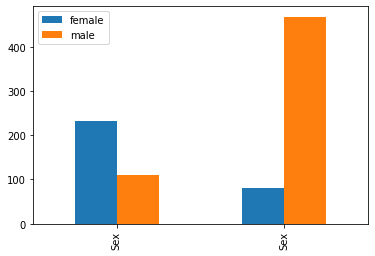

In [ ]:
graph('Sex')

            S   C   Q
Embarked  217  93  30
Embarked  427  75  47


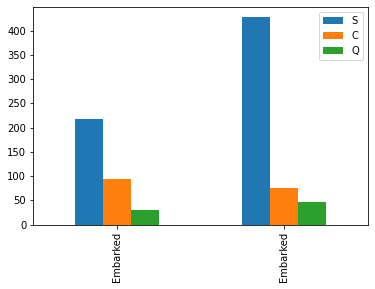

In [ ]:
graph('Embarked')

           0      1     2     3     4    5    8
SibSp  208.0  112.0  13.0   4.0   3.0  NaN  NaN
SibSp  398.0   97.0  15.0  12.0  15.0  5.0  7.0


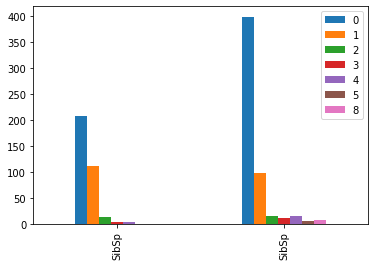

In [ ]:
graph('SibSp')

### Label Encodind

now like Male Female as M,F or 01

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le_S = LabelEncoder()
le_E = LabelEncoder()

In [ ]:
df_train['Sex'] = le_S.fit_transform (df_train['Sex'])
df_train['Embarked'] = le_E.fit_transform (df_train['Embarked'])


In [ ]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


sklearn preprocessor methods :- 

1. fit : analyze data and get insights but no changes done

2. fit-transform : analyze and make changes

3. transform : only change based on what we tell

In [ ]:
df_test['Sex'] = le_S.transform (df_test['Sex'])
df_test['Embarked'] = le_E.transform (df_test['Embarked'])
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [ ]:
le_S.classes_

array(['female', 'male'], dtype=object)

### Scaling

say data over 100 - 1000 
so bring the data to 0 to 1 or -1 to 1

to increase computation power
ease it

basically normalization to Z = X-U/s

using standard scalar

In [ ]:
df_train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [ ]:
# need numpy arrays for it
# target and features
X_train = df_train.iloc[: , 1:].values  # all rows but selected cols
Y_train = df_train.iloc[: , 0 ].values
X_test = df_test.values


In [ ]:
X_train.shape , Y_train.shape, X_test.shape, type(X_train)

((889, 7), (889,), (417, 7), numpy.ndarray)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
print(X_train[:10, :])
scale_x = StandardScaler ()
X_train = scale_x.fit_transform(X_train)
X_test = scale_x.fit_transform(X_test)
print(X_train[:10, :])

# scaled close to 0

[[ 3.          1.         22.          1.          0.          7.25
   2.        ]
 [ 1.          0.         38.          1.          0.         71.2833
   0.        ]
 [ 3.          0.         26.          0.          0.          7.925
   2.        ]
 [ 1.          0.         35.          1.          0.         53.1
   2.        ]
 [ 3.          1.         35.          0.          0.          8.05
   2.        ]
 [ 3.          1.         29.69911765  0.          0.          8.4583
   1.        ]
 [ 1.          1.         54.          0.          0.         51.8625
   2.        ]
 [ 3.          1.          2.          3.          1.         21.075
   2.        ]
 [ 3.          0.         27.          0.          2.         11.1333
   2.        ]
 [ 2.          0.         14.          1.          0.         30.0708
   0.        ]]
[[ 0.82520863  0.73534203 -0.59049493  0.43135024 -0.47432585 -0.50023975
   0.58683958]
 [-1.57221121 -1.35991138  0.64397101  0.43135024 -0.47432585  0.7889

### Model Fitting

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf = KNeighborsClassifier()
clf.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
predictions = clf.predict(X_train)

In [ ]:
predictions 

In [ ]:
# compare predictions and survived

(predictions == Y_train).sum()

763

In [ ]:
# accuracy
(predictions == Y_train).sum() / predictions.shape

array([0.85826772])

generating data with sklearn

- blobs and moons

module 3 vid 1 last 20 mins